### I collected two datasets(U.S. Real Farm Output; Agricultural and Food Research and Development Expenditures in the United States), merged them into one, and performed basic descriptive statistics and visualization.

Databases:

U.S. Real Farm Output: https://fred.stlouisfed.org/series/A2000X1A020NBEA

Food Research and Development Expenditures in the United States:
https://www.ers.usda.gov/data-products/agricultural-and-food-research-and-development-expenditures-in-the-united-states

### 1.1. Download

In [108]:
import requests
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np

def fetch_fred_data(api_key, series_id):
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&file_type=json&api_key={api_key}"
    response = requests.get(url)
    dictionary = response.json()['observations']
    df = pd.DataFrame(dictionary)[['date','value']]
    df.value = df.value.replace(".", np.nan).astype(float)
    df = df.dropna()
    return df

api_key = "84a9d7e701d4f1a764fc6a859ec98cd7"
series_id = "A2000X1A020NBEA"
RFO_data = fetch_fred_data(api_key, series_id) #RFO: Real Farm Output

RFO_data.head(10)

,date,value
12,2007-01-01,342.496
13,2008-01-01,330.513
14,2009-01-01,345.890
15,2010-01-01,346.715
16,2011-01-01,335.728
17,2012-01-01,340.156
18,2013-01-01,353.448
19,2014-01-01,359.453
20,2015-01-01,367.926
21,2016-01-01,390.054


In [109]:
FATUS_RD_url = "https://ers.usda.gov/sites/default/files/_laserfiche/DataFiles/47755/USagresearchexpenditures1970-2022.xlsx?v=63098"
#FATUS_RD: Agricultural and Food Research and Development Expenditures in the United States
response = requests.get(FATUS_RD_url)
FATUS_RD_data = pd.read_excel(io.BytesIO(response.content))

FATUS_RD_data.head(10)

,Year,"Public agricultural and food R&D \n(current U.S. dollars, millions)","Public agricultural and food R&D performed by USDA intramural agencies \n(current U.S. dollars, millions)","Public agricultural & food R&D performed by State universities and cooperating institutions \n(current U.S. dollars, millions)","Private agriculture input industries R&D \n(current U.S. dollars, millions)","Private food industry R&D \n(current U.S. dollars, millions)",R&D Price Index \n(2022 =100),"Public agricultural and food R&D \n(constant 2022 U.S. dollars, millions)","Public agricultural and food R&D performed by USDA intramural agencies \n(constant 2022 U.S. dollars, millions)","Public agricultural & food R&D performed by State universities and cooperating institutions \n(constant 2022 U.S. dollars, millions)","Private agriculture input industries R&D \n(constant 2022 U.S. dollars, millions)","Private food industry R&D \n(constant 2022 U.S. dollars, millions)"
0,1970,548.729398,229.134,319.595398,306.378,222.0,10.035998,5467.611561,2283.121174,3184.490387,3052.791,2212.037
1,1971,586.163402,243.377,342.786402,318.357,238.0,10.618279,5520.324003,2292.056942,3228.267061,2998.198,2241.418
2,1972,640.183852,277.193,362.990852,307.963,258.0,11.146782,5743.216663,2486.753534,3256.463129,2762.797,2314.569
3,1973,662.316697,267.250,395.066697,355.483,268.0,11.678994,5671.008007,2288.296364,3382.711642,3043.781,2294.718
4,1974,727.457427,287.494,439.963427,407.433,297.0,12.422608,5855.915717,2314.280631,3541.635086,3279.770,2390.802
5,1975,818.402626,318.969,499.433626,465.116,335.0,13.750356,5951.864998,2319.714486,3632.150513,3382.574,2436.301
6,1976,895.401897,354.136,541.265897,537.323,355.0,14.775838,6059.906143,2396.723671,3663.182471,3636.498,2402.571
7,1977,1026.890521,405.036,621.854521,628.324,415.0,15.953380,6436.821045,2538.872641,3897.948404,3938.501,2601.330
8,1978,1101.969279,421.021,680.948279,712.640,472.0,17.134631,6431.240182,2457.134899,3974.105283,4159.062,2754.655
9,1979,1219.394280,452.781,766.613280,802.101,528.0,18.558241,6570.635108,2439.784066,4130.851041,4322.075,2845.097


### 1.2 Manipulate Data


In [110]:
RFO_data = RFO_data.rename(columns={'date':'Year', 'value':'Real farm output (Billions of Chained 2017 Dollars)'})
RFO_data['Year'] = pd.to_datetime(RFO_data['Year'])
RFO_data['Year'] = RFO_data['Year'].dt.year

RFO_data.head(10)

,Year,Real farm output (Billions of Chained 2017 Dollars)
12,2007,342.496
13,2008,330.513
14,2009,345.890
15,2010,346.715
16,2011,335.728
17,2012,340.156
18,2013,353.448
19,2014,359.453
20,2015,367.926
21,2016,390.054


In [111]:
FATUS_RD_data.columns = FATUS_RD_data.columns.str.strip()
FATUS_RD_data['Year'] = pd.to_numeric(FATUS_RD_data['Year'], errors='coerce')
FATUS_RD_data = FATUS_RD_data[FATUS_RD_data['Year'] >= 2007]
FATUS_RD_data['Year'] = FATUS_RD_data['Year'].astype(int)

FATUS_RD_data.head(10)

,Year,"Public agricultural and food R&D \n(current U.S. dollars, millions)","Public agricultural and food R&D performed by USDA intramural agencies \n(current U.S. dollars, millions)","Public agricultural & food R&D performed by State universities and cooperating institutions \n(current U.S. dollars, millions)","Private agriculture input industries R&D \n(current U.S. dollars, millions)","Private food industry R&D \n(current U.S. dollars, millions)",R&D Price Index \n(2022 =100),"Public agricultural and food R&D \n(constant 2022 U.S. dollars, millions)","Public agricultural and food R&D performed by USDA intramural agencies \n(constant 2022 U.S. dollars, millions)","Public agricultural & food R&D performed by State universities and cooperating institutions \n(constant 2022 U.S. dollars, millions)","Private agriculture input industries R&D \n(constant 2022 U.S. dollars, millions)","Private food industry R&D \n(constant 2022 U.S. dollars, millions)"
37,2007,5151.405172,1650.373924,3501.031248,3418.170,2609.0,68.041005,7571.030437,2425.557842,5145.472596,5023.691,3834.452
38,2008,5516.148568,1604.302289,3911.846279,4289.474,2840.0,71.225947,7744.577346,2252.412714,5492.164633,6022.347,3987.311
39,2009,5506.778343,1516.357002,3990.421341,3945.300,4636.0,73.311121,7511.518443,2068.386065,5443.132378,5381.585,6323.734
40,2010,5218.850858,1693.855259,3524.995599,4129.663,4376.0,75.540512,6908.678187,2242.313720,4666.364467,5466.819,5792.918
41,2011,5303.863046,1608.787945,3695.075101,4357.701,5169.0,77.701726,6825.926956,2070.466169,4755.460787,5608.242,6652.362
42,2012,4913.544294,1483.343387,3430.200907,5832.582,4919.0,78.697085,6243.616647,1884.877170,4358.739477,7411.433,6250.549
43,2013,4414.029955,1334.741106,3079.288849,6150.027,5855.0,80.171081,5505.763279,1664.866039,3840.897240,7671.129,7303.132
44,2014,4523.154570,1468.434642,3054.719928,6148.914,6212.0,81.893958,5523.184725,1793.092776,3730.091949,7508.385,7585.419
45,2015,4822.324752,1479.711289,3342.613463,NaN,5840.0,83.559681,5771.114367,1770.843632,4000.270735,NaN,6989.017
46,2016,4799.512945,1494.786101,3304.726844,NaN,5867.0,85.376268,5621.600750,1750.821544,3870.779206,NaN,6871.933


In [112]:
df_merge_data = pd.merge(
    RFO_data,
    FATUS_RD_data,
    on='Year',
    how='outer'
)
df_merge_data.head(10)

,Year,Real farm output (Billions of Chained 2017 Dollars),"Public agricultural and food R&D \n(current U.S. dollars, millions)","Public agricultural and food R&D performed by USDA intramural agencies \n(current U.S. dollars, millions)","Public agricultural & food R&D performed by State universities and cooperating institutions \n(current U.S. dollars, millions)","Private agriculture input industries R&D \n(current U.S. dollars, millions)","Private food industry R&D \n(current U.S. dollars, millions)",R&D Price Index \n(2022 =100),"Public agricultural and food R&D \n(constant 2022 U.S. dollars, millions)","Public agricultural and food R&D performed by USDA intramural agencies \n(constant 2022 U.S. dollars, millions)","Public agricultural & food R&D performed by State universities and cooperating institutions \n(constant 2022 U.S. dollars, millions)","Private agriculture input industries R&D \n(constant 2022 U.S. dollars, millions)","Private food industry R&D \n(constant 2022 U.S. dollars, millions)"
0,2007,342.496,5151.405172,1650.373924,3501.031248,3418.170,2609.0,68.041005,7571.030437,2425.557842,5145.472596,5023.691,3834.452
1,2008,330.513,5516.148568,1604.302289,3911.846279,4289.474,2840.0,71.225947,7744.577346,2252.412714,5492.164633,6022.347,3987.311
2,2009,345.890,5506.778343,1516.357002,3990.421341,3945.300,4636.0,73.311121,7511.518443,2068.386065,5443.132378,5381.585,6323.734
3,2010,346.715,5218.850858,1693.855259,3524.995599,4129.663,4376.0,75.540512,6908.678187,2242.313720,4666.364467,5466.819,5792.918
4,2011,335.728,5303.863046,1608.787945,3695.075101,4357.701,5169.0,77.701726,6825.926956,2070.466169,4755.460787,5608.242,6652.362
5,2012,340.156,4913.544294,1483.343387,3430.200907,5832.582,4919.0,78.697085,6243.616647,1884.877170,4358.739477,7411.433,6250.549
6,2013,353.448,4414.029955,1334.741106,3079.288849,6150.027,5855.0,80.171081,5505.763279,1664.866039,3840.897240,7671.129,7303.132
7,2014,359.453,4523.154570,1468.434642,3054.719928,6148.914,6212.0,81.893958,5523.184725,1793.092776,3730.091949,7508.385,7585.419
8,2015,367.926,4822.324752,1479.711289,3342.613463,NaN,5840.0,83.559681,5771.114367,1770.843632,4000.270735,NaN,6989.017
9,2016,390.054,4799.512945,1494.786101,3304.726844,NaN,5867.0,85.376268,5621.600750,1750.821544,3870.779206,NaN,6871.933


In [113]:
df_merge_data.to_csv("df_merge_data.csv", encoding='utf-8')

### 2.4 Descriptive stats

In [114]:
for col in df_merge_data.columns:
    print(repr(col))

'Year'
'Real farm output (Billions of Chained 2017 Dollars)'
'Public agricultural and food R&D \n(current U.S. dollars, millions)'
'Public agricultural and food R&D performed by USDA intramural agencies \n(current U.S. dollars, millions)'
'Public agricultural & food R&D performed by State universities and cooperating institutions \n(current U.S. dollars, millions)'
'Private agriculture input industries R&D \n(current U.S. dollars, millions)'
'Private food industry R&D \n(current U.S. dollars, millions)'
'R&D Price Index \n(2022 =100)'
'Public agricultural and food R&D \n(constant 2022 U.S. dollars, millions)'
'Public agricultural and food R&D performed by USDA intramural agencies \n(constant 2022 U.S. dollars, millions)'
'Public agricultural & food R&D performed by State universities and cooperating institutions \n(constant 2022 U.S. dollars, millions)'
'Private agriculture input industries R&D \n(constant 2022 U.S. dollars, millions)'
'Private food industry R&D \n(constant 2022 U.S. d

In [115]:
df_merge_data.describe()

,Year,Real farm output (Billions of Chained 2017 Dollars),"Public agricultural and food R&D \n(current U.S. dollars, millions)","Public agricultural and food R&D performed by USDA intramural agencies \n(current U.S. dollars, millions)","Public agricultural & food R&D performed by State universities and cooperating institutions \n(current U.S. dollars, millions)","Private agriculture input industries R&D \n(current U.S. dollars, millions)","Private food industry R&D \n(current U.S. dollars, millions)",R&D Price Index \n(2022 =100),"Public agricultural and food R&D \n(constant 2022 U.S. dollars, millions)","Public agricultural and food R&D performed by USDA intramural agencies \n(constant 2022 U.S. dollars, millions)","Public agricultural & food R&D performed by State universities and cooperating institutions \n(constant 2022 U.S. dollars, millions)","Private agriculture input industries R&D \n(constant 2022 U.S. dollars, millions)","Private food industry R&D \n(constant 2022 U.S. dollars, millions)"
count,17.000000,17.000000,15.000000,16.000000,15.000000,8.000000,16.000000,16.000000,15.000000,16.000000,15.000000,8.000000,16.000000
mean,2015.000000,368.657588,5070.427241,1581.908165,3507.042445,4783.978875,5372.750000,83.341682,6232.598042,1915.448256,4313.437169,6261.703875,6371.525250
std,5.049752,25.451844,339.567742,127.975275,267.463307,1085.745115,1326.409665,9.194161,840.251978,230.341629,626.199063,1087.986429,1119.304068
min,2007.000000,330.513000,4414.029955,1334.741106,3054.719928,3418.170000,2609.000000,68.041005,5449.901443,1634.243657,3730.091949,5023.691000,3834.452000
25%,2011.000000,345.890000,4867.934523,1491.925422,3357.299542,4083.572250,4848.250000,77.161422,5621.556967,1756.682895,3858.693409,5445.510500,6136.141250
50%,2015.000000,367.926000,5047.069243,1589.353180,3498.202844,4323.587500,5770.000000,82.726819,5746.658118,1845.606601,3949.935539,5815.294500,6621.421000
75%,2019.000000,391.903000,5314.004713,1650.964014,3689.806059,5911.665000,5953.250000,90.256048,6867.302572,2068.906091,4710.912627,7435.671000,6905.864500
max,2023.000000,401.651000,5516.148568,1859.758698,3990.421341,6150.027000,7910.000000,100.000000,7744.577346,2425.557842,5492.164633,7671.129000,7910.000000


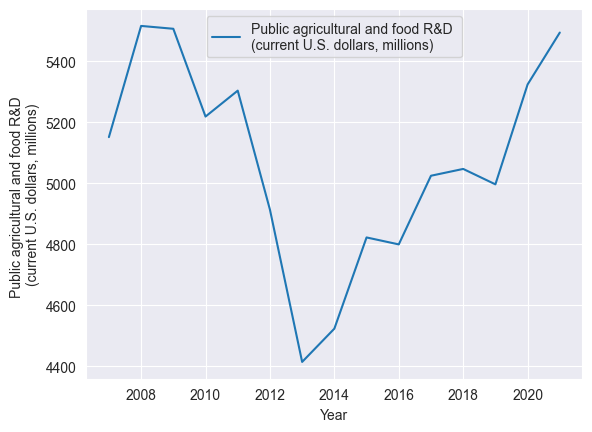

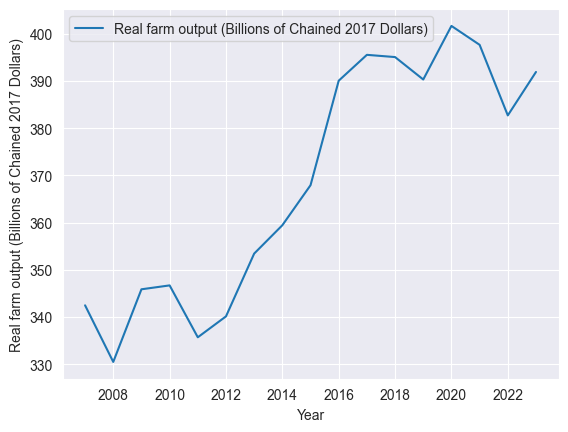

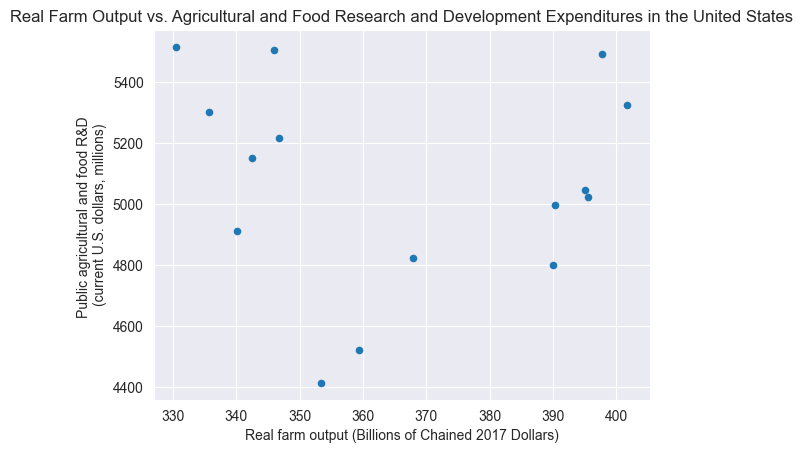

In [116]:
df_merge_data.plot(x='Year', y='Public agricultural and food R&D \n(current U.S. dollars, millions)')
plt.xlabel("Year")
plt.ylabel("Public agricultural and food R&D \n(current U.S. dollars, millions)")
plt.grid(True)
plt.show()

df_merge_data.plot(x='Year', y='Real farm output (Billions of Chained 2017 Dollars)')
plt.xlabel("Year")
plt.ylabel("Real farm output (Billions of Chained 2017 Dollars)")
plt.grid(True)
plt.show()

df_merge_data.plot(kind='scatter', x='Real farm output (Billions of Chained 2017 Dollars)', y='Public agricultural and food R&D \n(current U.S. dollars, millions)')
plt.xlabel("Real farm output (Billions of Chained 2017 Dollars)")
plt.ylabel("Public agricultural and food R&D \n(current U.S. dollars, millions)")
plt.title("Real Farm Output vs. Agricultural and Food Research and Development Expenditures in the United States")
plt.show()